# Introduction to Gaussian Process

Author: Matheus de Oliveira Schossler

Date: November 24, 2024

A **Gaussian process** are used to define **probability distribution
over functions**. With this concept, we can build the Gaussian process
regression algorithm (GPR), which is a data-based prediction method
with good performance in dealing with **high dimension small samples,
nonlinear problems**. In this report we will define and give examples of 
Gaussian Process usage building our intuition from simpler algorithms. We 
will also Let us start with a simpler algorithm to build
our intuition around Gaussian processes: the Bayesian linear regression. 

## References

1. Rasmussen, C. E. & Williams, C. K. I. (2006). *Gaussian Processes for Machine Learning*. Massachusetts Institute of Technology. ISBN: 026218253X. [URL](http://www.gaussianprocess.org/gpml/).
2. McClarren, R. G. (2018). *Uncertainty Quantification and Predictive Computational Science*. Springer. [DOI](https://doi.org/10.1007/978-3-319-99525-0).
3. [Jie Wang, An Intuitive Tutorial to Gaussian Processes Regression](http://arxiv.org/abs/2009.10862)
4. [CBE 67701: Uncertainty Quantification](https://ndcbe.github.io/cbe67701-uncertainty-quantification/).
5. [Gaussian Process Regression Tutorial](https://juanitorduz.github.io/gaussian_process_reg/).
6. Ng, A., Updated by Ma, T. (2022). *CS229 Lecture Notes*. [Stanford University](https://cs229.stanford.edu/notes2022fall/main_notes.pdf).
7. [PyMC Gaussian Processes Tutorial](https://www.pymc.io/projects/docs/en/latest/learn/core_notebooks/Gaussian_Processes.html).
8. [PyMC Examples: Gaussian Processes - Latent](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-Latent.html).
9. [PyMC Examples: Gaussian Processes - Marginal](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-Marginal.html)
10. [Bayesian Regression Tutorial by Juanito Rdz](https://juanitorduz.github.io/reg_bayesian_regression/)
11. [gaussian_processes/HSGP-Basic](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/HSGP-Basic.html)

Other references are indicated in the text.

In [1]:
from IPython.display import display, HTML, Image

display(HTML("<style>.container { width:80% !important; }</style>"))

# Gaussian Process

A **Gaussian Process (GP)** is a framework used to define probability distributions over functions, offering a Bayesian probabilistic perspective. 
A Gaussian process extends the concept of a Gaussian probability distribution. While a probability distribution characterizes random variables that are either scalars or vectors (as in multivariate distributions), a stochastic process defines the behavior of functions.
This framework allows us to use GPs as priors in function space, which is particularly advantageous in Bayesian statistics. The Gaussian Process Regression (GPR) algorithm, derived from this concept, excels in predicting outcomes from high-dimensional, small-sample, and nonlinear datasets.

A GP is essentially a collection of random variables, any finite subset of which will have a jointly Gaussian distribution [Ref. 1]. This property ensures that the joint distributions are consistent across different subsets. For instance, if the joint distribution of $f(x_1), f(x_2), \ldots, f(x_n)$ is known, the distribution of a smaller subset $f(x_1), f(x_2)$ should correspond to what would be derived by marginalizing out $f(x_3), \ldots, f(x_n)$ from the full set.

A Gaussian process is fully characterized by its mean function $m(x)$ and covariance function $\Sigma_{ij} = k(x, x')$:

\begin{equation}
f \sim \mathcal{GP}(m, k),
\tag{1.1}
\end{equation}

This notation indicates that the function $f$ is distributed as a Gaussian Process with mean function $m$ and covariance function $k$. The vector notation for a set of indices $\{x_i \in \mathcal{X}\}_{i=1}^m$ representing the variables is denoted by $\boldsymbol{f}$:

\begin{equation}
\left[ \begin{array}{c}
f(x_1) \\
\vdots \\
f(x_m)
\end{array} \right]
\sim \mathcal{N}\left(
\left[ \begin{array}{c}
m(x_1) \\
\vdots \\
m(x_m)
\end{array} \right],
\left[ \begin{array}{ccc}
k(x_1, x_1) & \cdots & k(x_1, x_m) \\
\vdots & \ddots & \vdots \\
k(x_m, x_1) & \cdots & k(x_m, x_m)
\end{array} \right]
\right),
\tag{1.2}
\end{equation}

where $\mathcal{N}(m, \Sigma)$ denotes a multivariate Gaussian distribution with mean vector $m$ and covariance matrix $\Sigma$, as previously defined.


## Examples

Numerous models frequently used in both machine learning and statistics are actually specific instances of, or variations on, Gaussian processes. In this discussion, we will provide a few examples to illustrate the concept of Gaussian processes.

### Bayesian Linear Regression

Consider a training set $S = \{(x^{(i)}, y^{(i)})\}_{i=1}^m$ of i.i.d. examples drawn from an unknown distribution. Linear regression models the relationship between $x^{(i)}$ and $y^{(i)}$ as:

$$
y^{(i)} = \theta^T x^{(i)} + \varepsilon,
\tag{2.1}
$$

where $\varepsilon$ represents i.i.d. noise following a normal distribution $\mathcal{N}(0, \sigma^2)$. This relationship leads to the likelihood function:

\begin{equation}
p(y^{(i)} | x^{(i)}, \theta) = \frac{1}{\sqrt{2\pi} \sigma} \exp\left(-\frac{(y^{(i)} - \theta^T x^{(i)})^2}{2\sigma^2}\right).
\tag{2.2}
\end{equation}

In Bayesian linear regression, we introduce a **prior distribution** over the parameters $\theta$:

\begin{equation}
\theta \sim \mathcal{N}(0, \tau^2 I),
\tag{2.3}
\end{equation}

Utilizing Bayes' rule, the posterior distribution of $\theta$ given the training set $S$ is defined as:

\begin{equation}
p(\theta | S) = \frac{p(\theta) p(S | \theta)}{\int_{\theta'} p(\theta') p(S | \theta') \, d\theta'}.
\tag{2.4}
\end{equation}

Here, $p(S | \theta) = \prod_i p(y^{(i)} | x^{(i)}, \theta)$, where each $p(y^{(i)} | x^{(i)}, \theta)$ is the normal distribution defined in equation (1.2). The prediction for a new test point $x_*$ using this model is characterized by the **posterior predictive distribution**:

\begin{equation}
p(y_* | x_*, S) = \int_\theta p(y_* | x_*, \theta) p(\theta | S) \, d\theta.
\tag{2.5}
\end{equation}

For the linear regression model described above, both $p(\theta | S)$ and $p(y_* | x_*, S)$ can be expressed in terms of a closed-form solution involving $X_*$, $S$, $\sigma$, and $\tau$. [Ref. 2] [[Ref. 8]](https://juanitorduz.github.io/reg_bayesian_regression/). It can also be demonstrated that **Bayesian Linear Regression (BLR) is equivalent to Gaussian Process Regression (GPR) with a kernel defined by the dot product**.

A Gaussian process $f(x)$ is completely specified by its mean function $m(x)$ and its covariance function $k(x, x')$, where $x \in X$ denotes a point in the index set $X$. These functions are defined as follows:

\begin{equation}
m(x) = \mathbb{E}[f(x)] \quad \text{and} \quad
k(x, x') = \mathbb{E}[(f(x) - m(x))(f(x') - m(x'))].
\tag{2.6}
\end{equation}

As shown in [Ref. 8](https://juanitorduz.github.io/reg_bayesian_regression/), $f(x)$ as defined in (2.1) constitutes a Gaussian Process because $\theta \sim \mathcal{N}(0, \tau^2 I)$. Furthermore, as shown in [this post](https://stats.stackexchange.com/questions/507527/bayesian-linear-regression-as-a-gaussian-process), $m(x) = 0$ and $k(x, x') = \tau^2 x^T x + \sigma^2$.

### Kernel Ridge Regression

The Bayesian linear model suffers from limited expressiveness. A very
simple idea to overcome this problem is to project the inputs into
some high dimensional space using a set of basis feature space functions,
e.g. $\left\{ 1,x,x^{2},\ldots,x^{d-1}\right\} $, and then apply
the linear model in this space instead of directly on the inputs themselves.
This type of map also defines a simple example of a Gaussian process:

\begin{equation}
f(\boldsymbol{x})=\phi\left(\boldsymbol{x}\right)^{T}\boldsymbol{\theta}
\tag{2.7}\end{equation}

where $\boldsymbol{x}$ is a $p$ variable input, $\phi\left(\boldsymbol{x}\right)$ is a $p\times d$ dimension vector, and the prior $\boldsymbol{\theta}\sim\mathcal{N}\left(\boldsymbol{0},\Sigma_{p}\right)$,
where $\Sigma_{p}$ is a a $p\times p$ covariance matrix, which implies

\begin{align}
\mathbb{E}[f(\boldsymbol{x})] & =\phi\left(\boldsymbol{x}\right)^{T}\mathbb{E}[\boldsymbol{\theta}]=0\tag{2.8} \end{align}

\begin{align}
\mathbb{E}[f(\boldsymbol{x})f(\boldsymbol{x}')] & =\phi\left(\boldsymbol{x}\right)^{T}\mathbb{E}[\boldsymbol{\theta}\boldsymbol{\theta}^{T}]\phi\left(\boldsymbol{x}'\right)=\phi\left(\boldsymbol{x}\right)^{T}\Sigma_{p}\phi\left(\boldsymbol{x}'\right).\tag{2.9}
\end{align}

$f(\boldsymbol{x})$ and $f(\boldsymbol{x}')$ are jointly Gaussian
with zero mean and covariance $k(\boldsymbol{x},\boldsymbol{x}')=\phi\left(\boldsymbol{x}\right)^{T}\Sigma_{p}\phi\left(\boldsymbol{x}'\right)$.
Therefore any combination of $f(\boldsymbol{x}^{(i)})$, with $\boldsymbol{x}^{(i)}$
in the input set $X$ is a Gaussian process. Using the kernel trick
it is possible to show that, fundamentally all we need to know about
the feature map $\phi\left(\boldsymbol{x}\right)$ is encapsulated
in the corresponding kernel function $k(\boldsymbol{x},\boldsymbol{x}')\ (=\Sigma_{p})$. We only need to specify weighted inner products of the feature space and never need to specify the feature space.

## Gaussian Process Regression

Gaussian Process Regression (GPR) excels in dealing with high-dimensional, small-sample nonlinear problems. GPR uses a kernel to define the covariance of a prior distribution over the target functions and leverages observed training data to establish a likelihood function. Employing Bayes' theorem, GPR derives a Gaussian posterior distribution over target functions, utilizing the mean for prediction.

Consider a training set $S = \{(x^{(i)}, y^{(i)})\}_{i=1}^m$ of i.i.d. examples from an unknown distribution. In a noisy regression algorithm, the task is to estimate a function $f$ such that:

\begin{equation}
y^{(i)} = f(x^{(i)}) + \varepsilon, \quad i = 1, \ldots, m \tag{3.1}
\end{equation}

where $\varepsilon$ are i.i.d. noise terms following a $\mathcal{N}(0, \sigma^2)$ distribution.

We assume a zero-mean Gaussian process prior distribution over functions $f(\cdot)$:

\begin{equation}
f \sim \mathcal{GP}(0, k), \tag{3.2}
\end{equation}

with a valid covariance function (kernel) $k(\cdot, \cdot)$. The squared-exponential covariance function is given by:

\begin{equation}
k(\boldsymbol{x}, \boldsymbol{x}') = \sigma_f \exp\left(-\frac{1}{2l^2} \|\boldsymbol{x} - \boldsymbol{x}'\|^2\right), \tag{3.3}
\end{equation}

where $\sigma_f$ and $l$ are hyperparameters. This kernel can be show to be a Bayesian linear regression model with an infinitely dimensional basis [Ref 1].

Now, let $T = \{(x_*^{(i)}, y_*^{(i)})\}_{i=1}^m$ be a test set of i.i.d. examples from the same unknown distribution as $S$. We aim to compute the posterior predictive distribution over the testing outputs $y_*^{(i)}$. The joint distribution of the sets $\{f(x) : x \in X\}$ and $\{f_*(x) : x \in X_*\}$ is expressed as:

\begin{equation}
\left[\begin{array}{c}
\boldsymbol{f} \\
\boldsymbol{f_*}
\end{array}\right] \bigg| X, X_* \sim \mathcal{N}\left(0, \left[\begin{array}{cc}
K(X, X) & K(X, X_*) \\
K(X_*, X) & K(X_*, X_*)
\end{array}\right]\right) \Rightarrow \boldsymbol{f_*} | \boldsymbol{f} \sim \text{Normal distribution}. \tag{3.4}
\end{equation}

By conditioning a joint Gaussian distribution, we find an expression for $\boldsymbol{f_*} | \boldsymbol{f}$. 
Thus, the posterior predictive distribution is determined as follows:

<!--. The joint Gaussian i.i.d. noise vector is:
\begin{equation}
\left[\begin{array}{c}
\boldsymbol{\varepsilon} \\
\boldsymbol{\varepsilon_*}
\end{array}\right] \bigg| X, X_* \sim \mathcal{N}\left(0, \left[\begin{array}{cc}
\sigma^2 I & 0 \\
0 & \sigma^2 I
\end{array}\right]\right). \tag{3.5}
\end{equation}
-->


<!--
\begin{align}
\left[\begin{array}{c}
\boldsymbol{y} \\
\boldsymbol{f_*}
\end{array}\right] \bigg| X, X_* & = \left[\begin{array}{c}
\boldsymbol{f} \\
\boldsymbol{f_*}
\end{array}\right] + \left[\begin{array}{c}
\boldsymbol{\varepsilon} \\
\boldsymbol{\varepsilon_*}
\end{array}\right] \sim \mathcal{N}\left(0, \left[\begin{array}{cc}
K(X, X) + \sigma^2 I & K(X, X_*) \\
K(X_*, X) & K(X_*, X_*) + \sigma^2 I
\end{array}\right]\right). \tag{3.6}
\end{align}
-->

\begin{align}
\left[\begin{array}{c}
\boldsymbol{y} \\
\boldsymbol{f_*}
\end{array}\right] \bigg| X, X_* & \sim \mathcal{N}\left(0, \left[\begin{array}{cc}
K(X, X) + \sigma^2 I & K(X, X_*) \\
K(X_*, X) & K(X_*, X_*)
\end{array}\right]\right). \tag{3.5}
\end{align}

The predictive distribution for the test outputs is given by:

\begin{equation}
\boxed{\boldsymbol{f_*} | \boldsymbol{y}, X, X_* \sim \mathcal{N}(\mu_*, \Sigma_*)} \tag{3.6}
\end{equation}

where $\mu_*$ and $\Sigma_*$ are functions of $X_*$, $S$, $k(\cdot, \cdot)$, and $\sigma$:

\begin{equation}
\mu_* = K(X_*, X) \varLambda^{-1} \boldsymbol{y}, 
\Sigma_* = K(X_*, X_*) - K(X_*, X) \varLambda^{-1} K(X, X_*). \tag{3.8}
\end{equation}

where $\varLambda = K(X, X) + \sigma^2 I$.

A particular case of this derivation  when $\sigma=0$ corresponds to noise-free observations, where $S = \{(x^{(i)}, f^{(i)})\}_{i=1}^m$ and $T = \{(x_*^{(i)}, f_*^{(i)})\}_{i=1}^m$. In PyMC the noise-free case is modeled with [pymc.gp.Latent](https://www.pymc.io/projects/docs/en/stable/api/gp/generated/pymc.gp.Latent.html#pymc.gp.Latent) while the noisy case is modeled with [pymc.gp.Marginal](https://www.pymc.io/projects/docs/en/stable/api/gp/generated/pymc.gp.Marginal.html).

### Numerical implementation of Gaussian Process Regression

Below, we outline the steps of the Gaussian Process Regression algorithm as implemented in [scikit-learn's GaussianProcessRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#rf75674b0f418-rw2006) and, up to the prior specification for $f$ (using Cholesky decomposition), in [PyMC's Gaussian Processes](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-Latent.html). The procedure follows Algorithm 2.1 from [Ref. 1](http://www.gaussianprocess.org/gpml/):


**Inputs:**
- $X$: inputs
- $y$: targets
- $k$: covariance function
- $\sigma_n^2$: noise level
- $x_*$: test input

**Algorithm Steps:**

1. Compute the Cholesky decomposition of $(K + \sigma_n^2 I)$:
   $$ L = \text{cholesky}(K + \sigma_n^2 I) $$

2. Solve for $\alpha$:
   $$ \alpha = L^T \backslash (L \backslash y) $$

   This notation means that we first solve $L \backslash y$ (find $x: Lx=y$) and then solve $L^T \backslash (L \backslash y)$.

3. Compute the predictive mean at the test points:
   $$ f_* = k^T_* \alpha $$

4. Compute the vector of covariances between the test points and the training points:
   $$ v = L \backslash k_* $$

5. Compute the predictive variance at the test points:
   $$ V[f_*] = k(x_*, x_*) - v^T v $$

6. Calculate the log marginal likelihood:
   $$ \log p(y|X) = -\frac{1}{2} y^T \alpha - \sum \log L_{ii} - \frac{n}{2} \log 2\pi $$

**Return:**
- $f_*$: predictive mean
- $V[f_*]$: predictive variance
- $\log p(y|X)$: log marginal likelihood

**Notes:**
- For multiple test cases, repeat calculations of $f_*$ and $V[f_*]$.
- Computational complexity is $n^3/6$ for the Cholesky decomposition and $n^2/2$ for solving triangular systems.


## Model Selection

The Gaussian Process Regressor is useful if we have enough prior information about a dataset to confidently specify prior mean and covariance functions. However, having such detailed prior information is not typically the case in applications. We may use a hierarchical specification to represent vague prior information simply in the form of $m$ and $k$, and optimize these introduced hyperparameters based on the data.

### Maximum Likelihood Estimation

In libraries such as scikit-learn and GPy, model selection is implemented using a frequentist approach commonly employed in GPR model selection via Maximum Likelihood Estimation [Ref. 3]. We now introduce this method. We start by defining a model:

\begin{equation}
f \sim \mathcal{GP}(m, k),
\tag{4.1}
\end{equation}

where the Squared Exponential (SE) Kernel, including an additional noise term, is given by:

\begin{align}
m(\boldsymbol{x}) &= a\boldsymbol{x}^2 + b\boldsymbol{x} + c, \tag{4.2}
\end{align}

\begin{align}
k(\boldsymbol{x}, \boldsymbol{x}') &= \sigma_f^2 \exp\left(-\frac{1}{2}(\boldsymbol{x} - \boldsymbol{x}')^T M (\boldsymbol{x} - \boldsymbol{x}')\right) + \sigma_n^2 \delta_{ii'}.
\tag{4.3}
\end{align}

We define the set of hyperparameters as:

\begin{equation}
\Theta = \{a, b, c, \{M\}, \sigma_f, \sigma_n\},
\tag{4.4}
\end{equation}

where $M$ can be defined in terms of the characteristic length-scales of correlations, $l_i$, which define the length scales in the input space where correlations become negligible. For high-dimensional datasets, this matrix could identify a few directions in the input space with especially high relevance (in the sense of PCA - high variance). Although we use the squared exponential, any positive definite function can be used as a covariance function.

The optimal hyperparameters, denoted as $\Theta^*$, are determined by maximizing the log marginal likelihood. This can be expressed as:

\begin{equation}
\Theta^* = \arg \max_\Theta \log p(y | X, \Theta). \tag{4.5}
\end{equation}


<!--
Given the marginal likelihood

\begin{align}
L & =\log p(\boldsymbol{y}|\boldsymbol{x},f)=-\frac{1}{2}\left(\log|\Sigma|+\left(\boldsymbol{y}-m\right)^{T}\Sigma^{-1}\left(\boldsymbol{y}-m\right)\right)
\tag{4.4}
\end{align}

we can maximize $L$ using its partial derivatives with respect to $H$:

\begin{equation}
\frac{\partial L}{\partial H_{m}},\frac{\partial L}{\partial H_{k}},
\tag{4.5}
\end{equation}

where $H_{m}$ and $H_{k}$ are used to indicate hyperparameters of
the mean and covariance functions, respectively, and optimization algorithms
such as the gradient descent, momentum gradient descent, or the Adam
algorithm.

The trade-off between penalty and data fit in the GP model is automatic
(based on the $L$ exact expression).
-->

### Bayesian Model Selection

The primary distinction between the Bayesian approach to inference and other optimization-based methods, such as MLE, lies in the marginal likelihood, which involves integrating over the parameter space. PyMC employs a fully Bayesian framework. It treats hyperparameters as random variables with specified prior distributions. Inference is performed over the full posterior distribution of both the GP function and its hyperparameters, providing a complete uncertainty quantification. The hierarchical structure for such an approach is completely described in section 5.2 of [Ref. 1], and it follows the general steps of utilizing priors of parameters, hyperparameters, and the likelihood function to sample the posterior distribution.  The posterior distribution is sampled using Markov Chain Monte Carlo (MCMC) methods.

## Numerical Examples

We will now illustrate the Gaussian Process Regression algorithm using a simple example. We will use the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#rf75674b0f418-rw2006) library to implement the algorithm. We will also demonstrate the Bayesian approach using the [PyMC](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-Marginal.html) library, and compare the results.


### Linear Function Example with scikit-learn

Now we use the [DotProduct](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.DotProduct.html#sklearn.gaussian_process.kernels.DotProduct) kernel from sklearn library to show an example of GP in action for a linear function.

As an example of linear function we use 

\begin{equation}
f(x)=0.4x+10, \tag{5.1}
\end{equation}

 on the range $x\in[0,100]$ for train data and $x\in[0,150]$ for
test data. We generate both train and test data utilizing this function
with white noise $\epsilon=\mathcal{N}\left(0,\sigma^{2}\right)$,
where $\sigma=1$.

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, DotProduct
from matplotlib import pyplot as plt
import seaborn as sns

import arviz as az
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

# Set random seed for reproducibility
np.random.seed(42)


# Define the linear function
def func(x):
    return 0.4 * x + 10


# Generate a random training dataset with seed
def generate_random_train_dataset(func, x_end, num_train, sigma_noise, seed=42):
    np.random.seed(seed)
    x = np.random.uniform(0, x_end, num_train)  # Randomly sample x values
    noise = np.random.normal(0, sigma_noise, num_train)  # Add Gaussian noise
    y = func(x) + noise
    return x, y


# Generate a test dataset with evenly spaced x values
def generate_random_test_dataset(func, x_end, num_test, sigma_noise, seed=42):
    np.random.seed(seed)
    x = np.linspace(0, x_end, num_test)  # Generate evenly spaced x values
    noise = np.random.normal(0, sigma_noise, num_test)  # Add Gaussian noise
    y = func(x) + noise
    return x, y


def gaussian_process_regressor(x, x_train, y_train, x_test, y_test, kernel, sigma_n=2):
    # Initialize Gaussian Process Regressor with the given kernel and noise level
    gp = GaussianProcessRegressor(kernel=kernel, alpha=sigma_n**2, n_restarts_optimizer=30)

    # Fit the GPR model on the training data
    gp.fit(x_train.reshape(-1, 1), y_train)

    # Predict mean and standard deviation on the test data
    y_prediction, std = gp.predict(x_test.reshape(-1, 1), return_std=True)

    # Evaluate model performance using MSE
    mse = mean_squared_error(y_test, y_prediction)
    print(f"MSE of Test Set: {mse:.4f}")

    # Display fitted kernel parameters
    params = gp.kernel_.get_params()
    print("Fitted Kernel Parameters:")
    display(params)

    # Generate samples from the posterior distribution
    y_posterior_samples = gp.sample_y(x.reshape(-1, 1), n_samples=1)

    # Compute mean and standard deviation of the posterior samples
    y_posterior = np.mean(y_posterior_samples, axis=1)

    return y_prediction, std, params, y_posterior


def plot_gp_predictions(x, x_test, y_test, x_train, y_train, f, y_prediction, y_posterior, std):
    # Sort x_test and corresponding predictions for smooth plotting
    sort_index = np.argsort(x_test)

    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 8))

    # Scatter plot of test data
    sns.scatterplot(x=x_test, y=y_test, label="Test Data", ax=ax, color="orange")

    # Scatter plot of training data
    sns.scatterplot(x=x_train, y=y_train, label="Train Data", marker="P", s=150, ax=ax, color="black")

    # Plot the ground truth function
    sns.lineplot(x=x_test, y=f(x_test), color="red", label="True Function - f(x_test)", ax=ax)

    # Plot the credible interval
    ax.fill_between(x=x_test[sort_index], y1=(y_prediction - 2 * std)[sort_index], y2=(y_prediction + 2 * std)[sort_index], color="green", alpha=0.25, label="Credible Interval (±2σ)")

    # Plot the predicted mean
    sns.lineplot(x=x_test, y=y_prediction, color="green", label="Prediction (Mean)", ax=ax)

    # Plot the posterior samples
    sns.lineplot(x=x, y=y_posterior, color="blue", linestyle="-.", label="Posterior Sample Example", ax=ax)

    # Customize plot appearance
    ax.set_title("Gaussian Process Regression with Maximum Likelihood Optimization on Hyperparameters", fontsize=16)
    ax.set_xlabel("x", fontsize=16)
    ax.set_ylabel("y", fontsize=16)
    ax.grid(True)
    ax.legend(loc="upper left", fontsize=12)

    # Display the plot
    plt.show()



### DotProduct Kernel Comparison

We begin by exploring the relationship between the **DotProduct kernel** from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.DotProduct.html#sklearn.gaussian_process.kernels.DotProduct) and the **Linear kernel** from [PyMC](https://www.pymc.io/projects/docs/en/stable/api/gp/generated/pymc.gp.cov.Linear.html) to understand linear data relationships. This comparison helps in distinguishing between the mixed Bayesian-frequentist and fully Bayesian approaches described above.

The **DotProduct kernel** in scikit-learn is defined as:

\begin{equation}
k(x, x') = \tau^2 x^T x' + \sigma^2, \tag{6.1}
\end{equation}

where $\tau^2$ scales the linear function and $\sigma^2$ represents the noise level. 

To implement a similar kernel in PyMC, we need to adjust the standard **Linear kernel**, which is defined as:

\begin{equation}
k(x, x') = (x - c)(x' - c), \tag{6.3}
\end{equation}

Here, $c$ represents a constant offset.

For a direct comparison, the Linear kernel in PyMC can be modified to match the form of the DotProduct kernel in scikit-learn by setting $c = 0$ and incorporating a noise term, resulting in the following expression:

\begin{equation}
  \text{DotProduct}_{\text{PyMC}} = \text{Linear}(c=0) + \text{Constant}(\sigma^2), \tag{6.4}
\end{equation}

This adaptation allows us to effectively compare the two approaches under similar conditions.


**Mixed Baysian-Classical approach with scickit-learn**

MSE of Test Set: 3.6980
Fitted Kernel Parameters:


{'k1': 0.442**2,
 'k2': DotProduct(sigma_0=17.2),
 'k1__constant_value': 0.1957795723545119,
 'k1__constant_value_bounds': (1e-05, 100000.0),
 'k2__sigma_0': 17.19854740387973,
 'k2__sigma_0_bounds': (1e-05, 100000.0)}

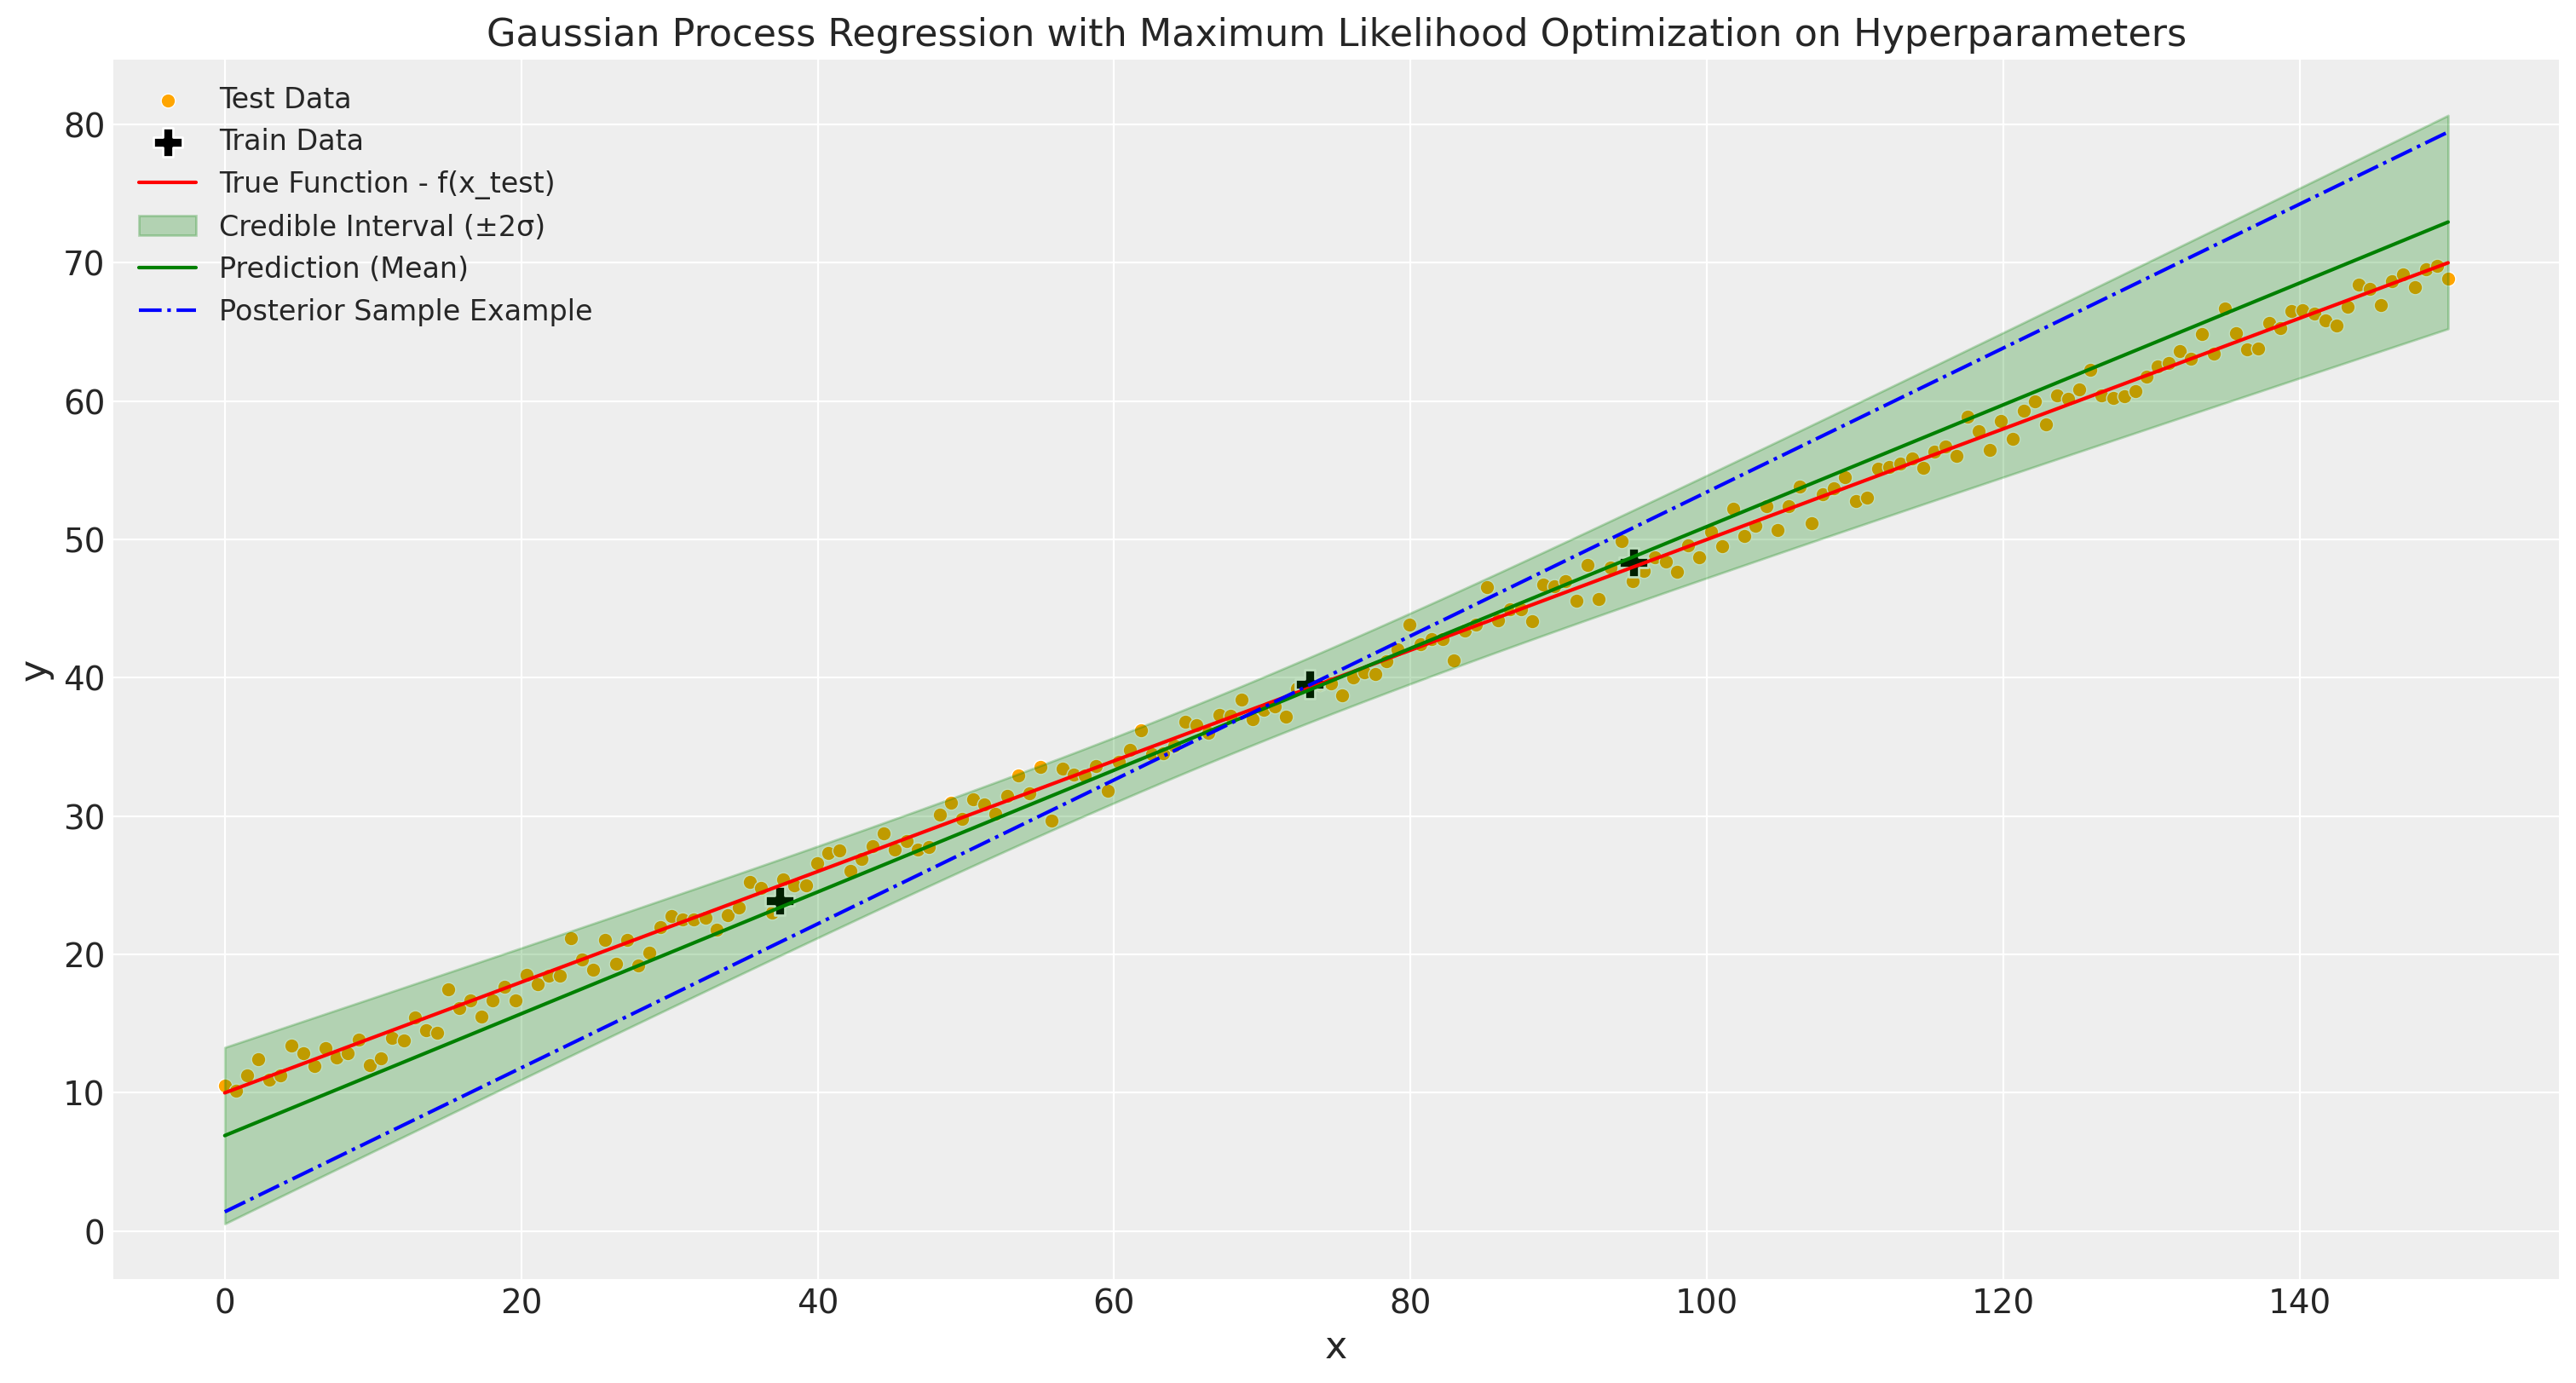

In [3]:
# Standard deviation of noise
sigma_noise = 1.0

# Generate synthetic data

x_values = np.linspace(0, 150, 1000)  # Range of x values for evaluation
x_train, y_train = generate_random_train_dataset(func, x_end=100, num_train=3, sigma_noise=sigma_noise)  # Training dataset
x_test, y_test = generate_random_test_dataset(func, x_end=150, num_test=200, sigma_noise=sigma_noise)  # Test dataset

# Define kernel parameters
sigma_f = 1.0  # Scale of the kernel function
sigma_0 = 100.0  # Noise level parameter for the DotProduct kernel

# Define the kernel
kernel_dot = ConstantKernel(constant_value=sigma_f) * DotProduct(sigma_0=sigma_0)

# Apply Gaussian Process Regressor
y_prediction, std, params, y_posterior = gaussian_process_regressor(x=x_values, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, kernel=kernel_dot)

# Plot the results
plot_gp_predictions(x=x_values, x_test=x_test, y_test=y_test, x_train=x_train, y_train=y_train, f=func, y_prediction=y_prediction, y_posterior=y_posterior, std=std)

**Fully Bayesian approach with PyMC**

In [4]:
import pymc as pm

with pm.Model() as model:
    # Priors for kernel parameters - same as the ones used in the previous example
    sigma_f = pm.HalfNormal("sigma_f", sigma=10)  # Scale parameter
    sigma_0 = pm.HalfNormal("sigma_0", sigma=100)  # Noise parameter for Dot Product kernel

    # sigma_f = pm.Uniform("sigma_f", lower=0, upper=10)  # Scale parameter
    # sigma_0 = pm.Uniform("sigma_0", lower=0, upper=100)  # Noise parameter for Dot Product kernel

    # Define the kernel
    cov = pm.gp.cov.Constant(sigma_f**2) * (pm.gp.cov.Linear(input_dim=1, c=0) + pm.gp.cov.Constant(sigma_0**2))

    gp = pm.gp.Marginal(cov_func=cov)

    # sigma = pm.Deterministic("sigma", sigma_noise)
    y_ = gp.marginal_likelihood("y", X=x_train.reshape(-1, 1), y=y_train, sigma=sigma_noise)

    marginal_post = pm.sample(5000, tune=2000, target_accept=0.95, nuts_sampler="numpyro")

    # add the GP conditional to the model, given the new X values
    f_pred = gp.conditional("f_pred", x_test.reshape(-1, 1))

    # Predict y values at test points using the posterior samples
    y_pred = gp.conditional("y_pred", x_test.reshape(-1, 1), pred_noise=True)
    y_samples = pm.sample_posterior_predictive(marginal_post.sel(draw=slice(0, 20)), var_names=["y_pred"])

    pred_samples = pm.sample_posterior_predictive(marginal_post.sel(draw=slice(0, 20)), var_names=["f_pred"])

  0%|          | 0/7000 [00:00<?, ?it/s]

  0%|          | 0/7000 [00:00<?, ?it/s]

  0%|          | 0/7000 [00:00<?, ?it/s]

  0%|          | 0/7000 [00:00<?, ?it/s]

There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
Sampling: [y_pred]


Output()

Sampling: [f_pred]


Output()

In [5]:
import arviz as az

summary = az.summary(marginal_post, var_names=["sigma_f", "sigma_0"], round_to=2, kind="stats")
summary

,mean,sd,hdi_3%,hdi_97%
sigma_f,1.68,2.28,0.12,5.47
sigma_0,46.01,44.19,0.28,129.53


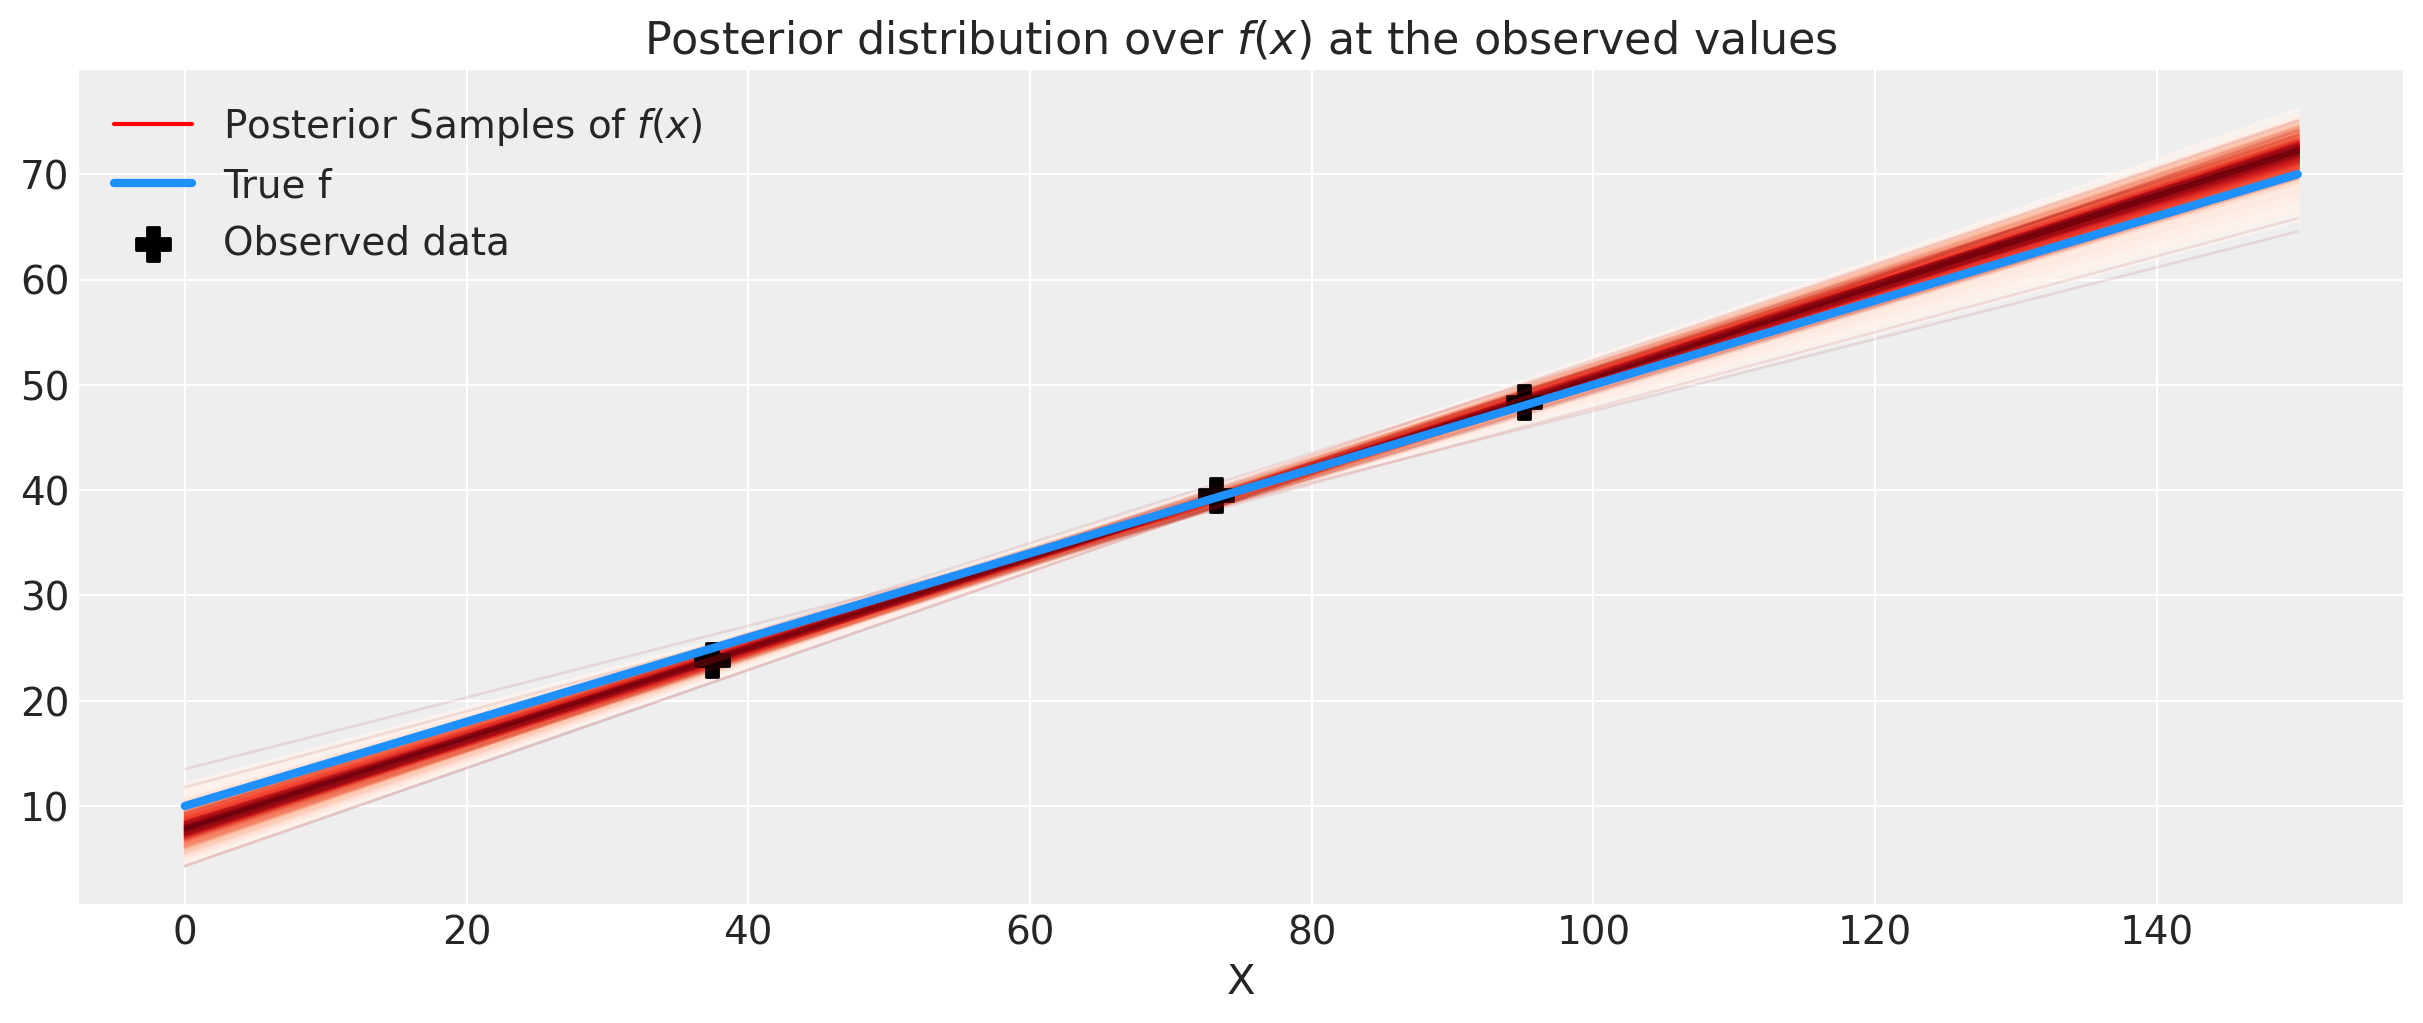

In [6]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc.gp.util import plot_gp_dist

f_pred_samples = az.extract(pred_samples, group="posterior_predictive", var_names=["f_pred"])
plot_gp_dist(ax, samples=f_pred_samples.T, x=x_test, fill_alpha=0.6, samples_alpha=0.1)

# # Add a label for the posterior predictive
plt.plot([], [], color="red", label=r"Posterior Samples of $f(x)$")

# plot the data and the true latent function
plt.plot(x_values, func(x_values), "dodgerblue", lw=3, label="True f")
plt.scatter(x_train, y_train, marker="P", s=150, color="black", label="Observed data")

# axis labels and title
plt.xlabel("X")
plt.title("Posterior distribution over $f(x)$ at the observed values")
plt.legend()  # This will now include the legend for red posterior predictions as well.

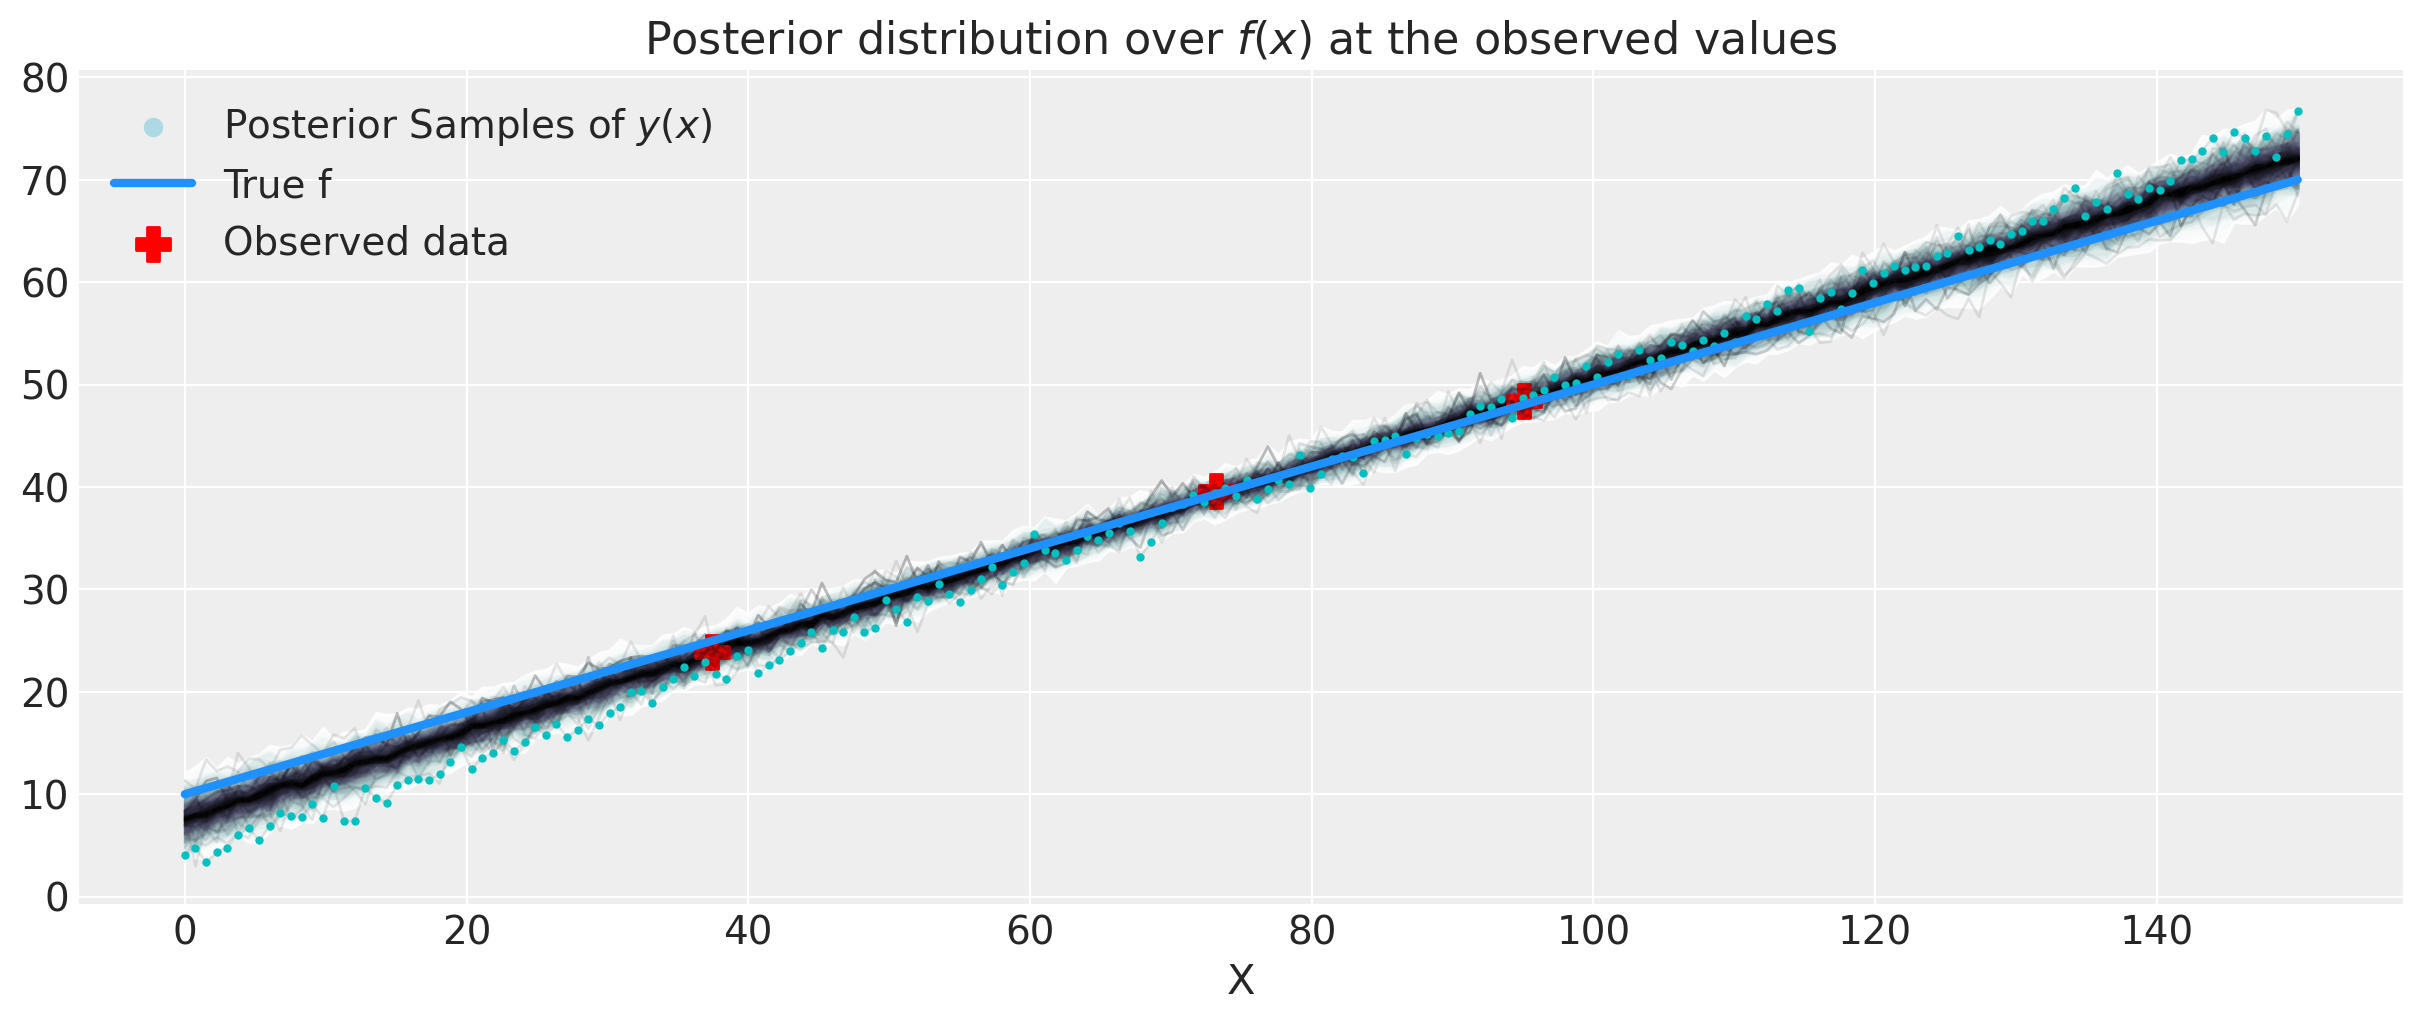

In [7]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc.gp.util import plot_gp_dist

# posterior predictive distribution
y_pred_samples = az.extract(y_samples, group="posterior_predictive", var_names=["y_pred"])
plot_gp_dist(ax, y_pred_samples.T, x=x_test, plot_samples=True, palette="bone_r")

# overlay a scatter of one draw of random points from the
#   posterior predictive distribution
plt.plot(x_test, y_pred_samples[:, 0], "co", ms=2)

# Add a label for the posterior predicted data
plt.scatter([], [], color="lightblue", label="Posterior Samples of $y(x)$")

# plot the data and the true latent function
plt.plot(x_values, func(x_values), "dodgerblue", lw=3, label="True f")
plt.scatter(x_train, y_train, marker="P", s=150, color="red", label="Observed data")

# axis labels and title
plt.xlabel("X")
plt.title("Posterior distribution over $f(x)$ at the observed values")
plt.legend()  # This will now include the legend for red posterior predictions as well.

/tmp/ipykernel_2325354/2061803742.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


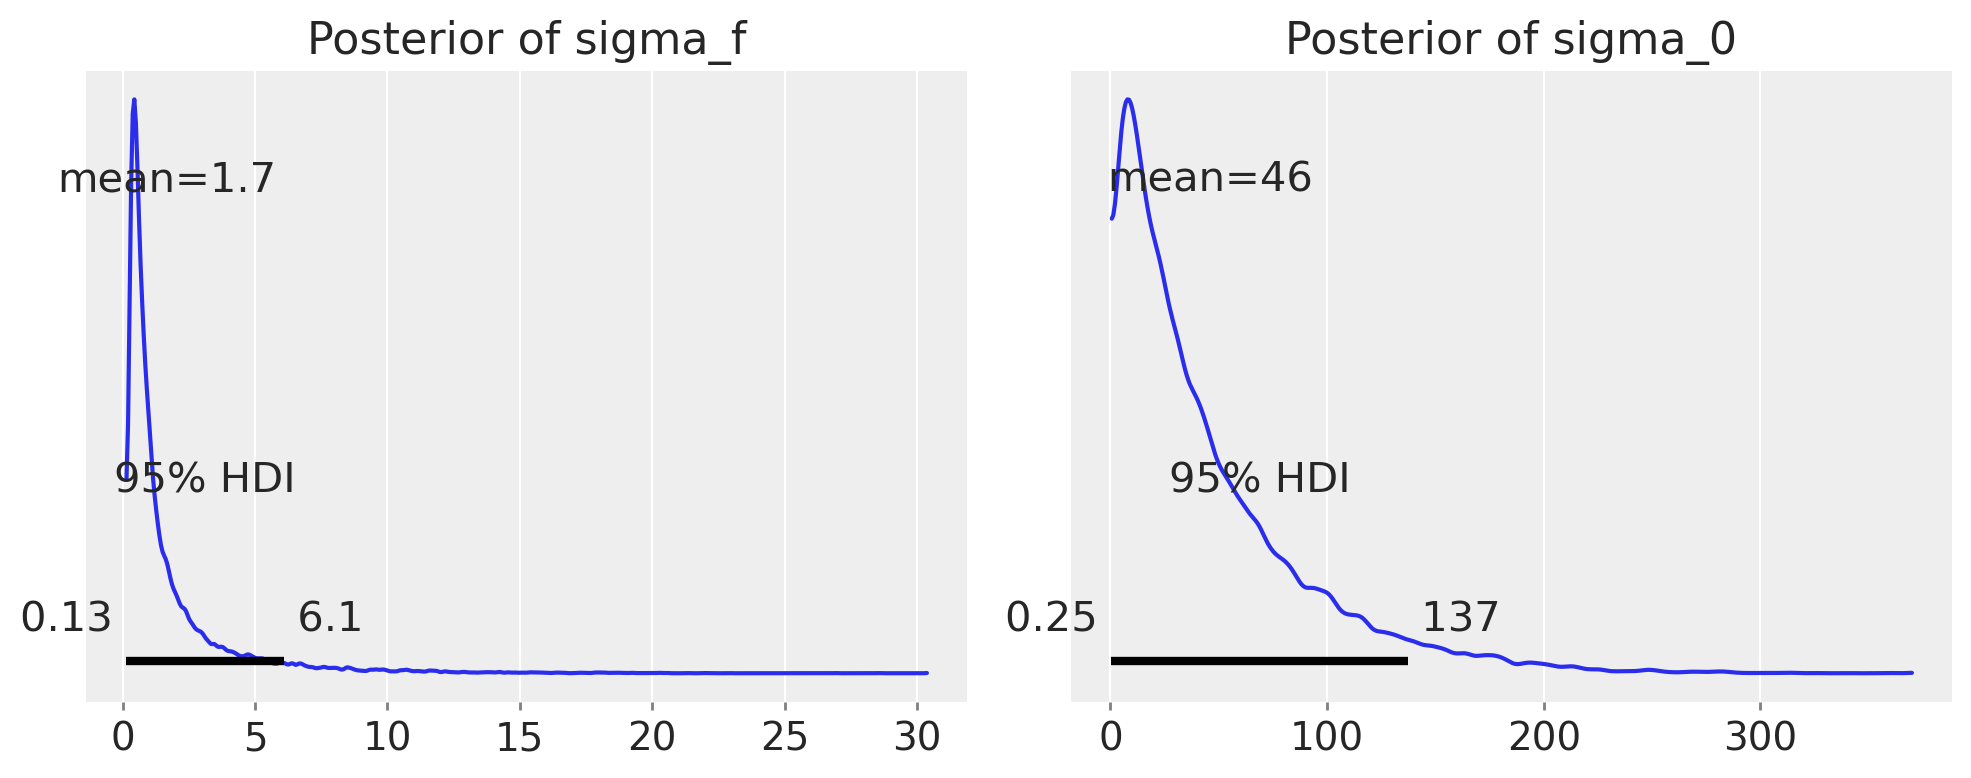

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs = axs.flatten()

# plot sigma_f
az.plot_posterior(marginal_post, var_names=["sigma_f"], ax=axs[0], hdi_prob=0.95)
axs[0].set_title("Posterior of sigma_f")

# plot sigma_0
az.plot_posterior(marginal_post, var_names=["sigma_0"], ax=axs[1], hdi_prob=0.95)
axs[1].set_title("Posterior of sigma_0")

plt.tight_layout()
plt.show()

In [9]:
# check Rhat, values above 1 may indicate convergence issues
n_nonconverged = int(np.sum(az.rhat(marginal_post)[["sigma_f", "sigma_0"]].to_array() > 1.03).values)
if n_nonconverged == 0:
    print("No Rhat values above 1.03, \N{check mark}")
else:
    print(f"The MCMC chains for {n_nonconverged} RVs appear not to have converged.")

No Rhat values above 1.03, ✓


We clearly see the advantages of the fully Bayesian approach offered by PyMC, which provides more comprehensive uncertainty quantification. The mixed Bayesian-classical approach in scikit-learn is more straightforward and computationally efficient but lacks the benefits of the full Bayesian framework. For example, PyMC samples the model parameters from the posterior distribution, providing a more complete understanding of the model's uncertainty, whereas scikit-learn provides only point estimates. More importantly, the PyMC approach allows us to obtain samples from the posterior distribution of the function $f$, rather than relying solely on the mean and variance estimates as in the scikit-learn implementation.

The first plot above for the PyMC illustrates that the DotProduct kernel generates only linear samples for $f$, which aligns with the theoretical derivation that a Bayesian Linear Regression (BLR) is equivalent to a Gaussian Process Regression (GPR) with a DotProduct kernel. Notice how the predictive uncertainty increases for input values that are distant from any training points.

### Squared-Exponential Kernel

Now we use the [Squared-Exponential (Radial basis function - RBF)](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html) kernel: 

\begin{equation}
K(x,x')=\sigma_{f}\exp\left(-\frac{1}{2l^{2}}||x-x'||^{2}\right), \tag{7.1}
\end{equation}

to tackle more exciting functions.

A much richer class of functions can be generated with the Squared-Exponential kernel. In fact, this kernel corresponds to a Bayesian linear regression model with an infinite dimensional basis (we can make the train data set as large as we want and the space the kernel operates in keeps growing without bound). Notice how the error bars get larger for input values that are distant from any training points.

## Gaussian process regression (GPR) on Mauna Loa CO2 data

This example is based on Section 5.4.3 of “Gaussian Processes for Machine Learning” by Rasmussen & Williams. It illustrates an example of complex kernel engineering and hyperparameter optimization using gradient ascent on the log-marginal-likelihood. The data consists of the monthly average atmospheric CO2 concentrations (in parts per million by volume (ppm)) collected at the Mauna Loa Observatory in Hawaii, between 1958 and 2001. The objective is to model the CO2 concentration as a function of the time and extrapolate for years after 2001. Reference [here](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html).

Fitted Kernel Parameters:


{'k1': 44.8**2 * RBF(length_scale=51.6) + 2.64**2 * RBF(length_scale=91.5) * ExpSineSquared(length_scale=1.48, periodicity=1) + 0.536**2 * RationalQuadratic(alpha=2.89, length_scale=0.968),
 'k2': 0.188**2 * RBF(length_scale=0.122) + WhiteKernel(noise_level=0.0367),
 'k1__k1': 44.8**2 * RBF(length_scale=51.6) + 2.64**2 * RBF(length_scale=91.5) * ExpSineSquared(length_scale=1.48, periodicity=1),
 'k1__k2': 0.536**2 * RationalQuadratic(alpha=2.89, length_scale=0.968),
 'k1__k1__k1': 44.8**2 * RBF(length_scale=51.6),
 'k1__k1__k2': 2.64**2 * RBF(length_scale=91.5) * ExpSineSquared(length_scale=1.48, periodicity=1),
 'k1__k1__k1__k1': 44.8**2,
 'k1__k1__k1__k2': RBF(length_scale=51.6),
 'k1__k1__k1__k1__constant_value': 2005.421371197315,
 'k1__k1__k1__k1__constant_value_bounds': (1e-05, 100000.0),
 'k1__k1__k1__k2__length_scale': 51.595329572387215,
 'k1__k1__k1__k2__length_scale_bounds': (1e-05, 100000.0),
 'k1__k1__k2__k1': 2.64**2 * RBF(length_scale=91.5),
 'k1__k1__k2__k2': ExpSineSqu

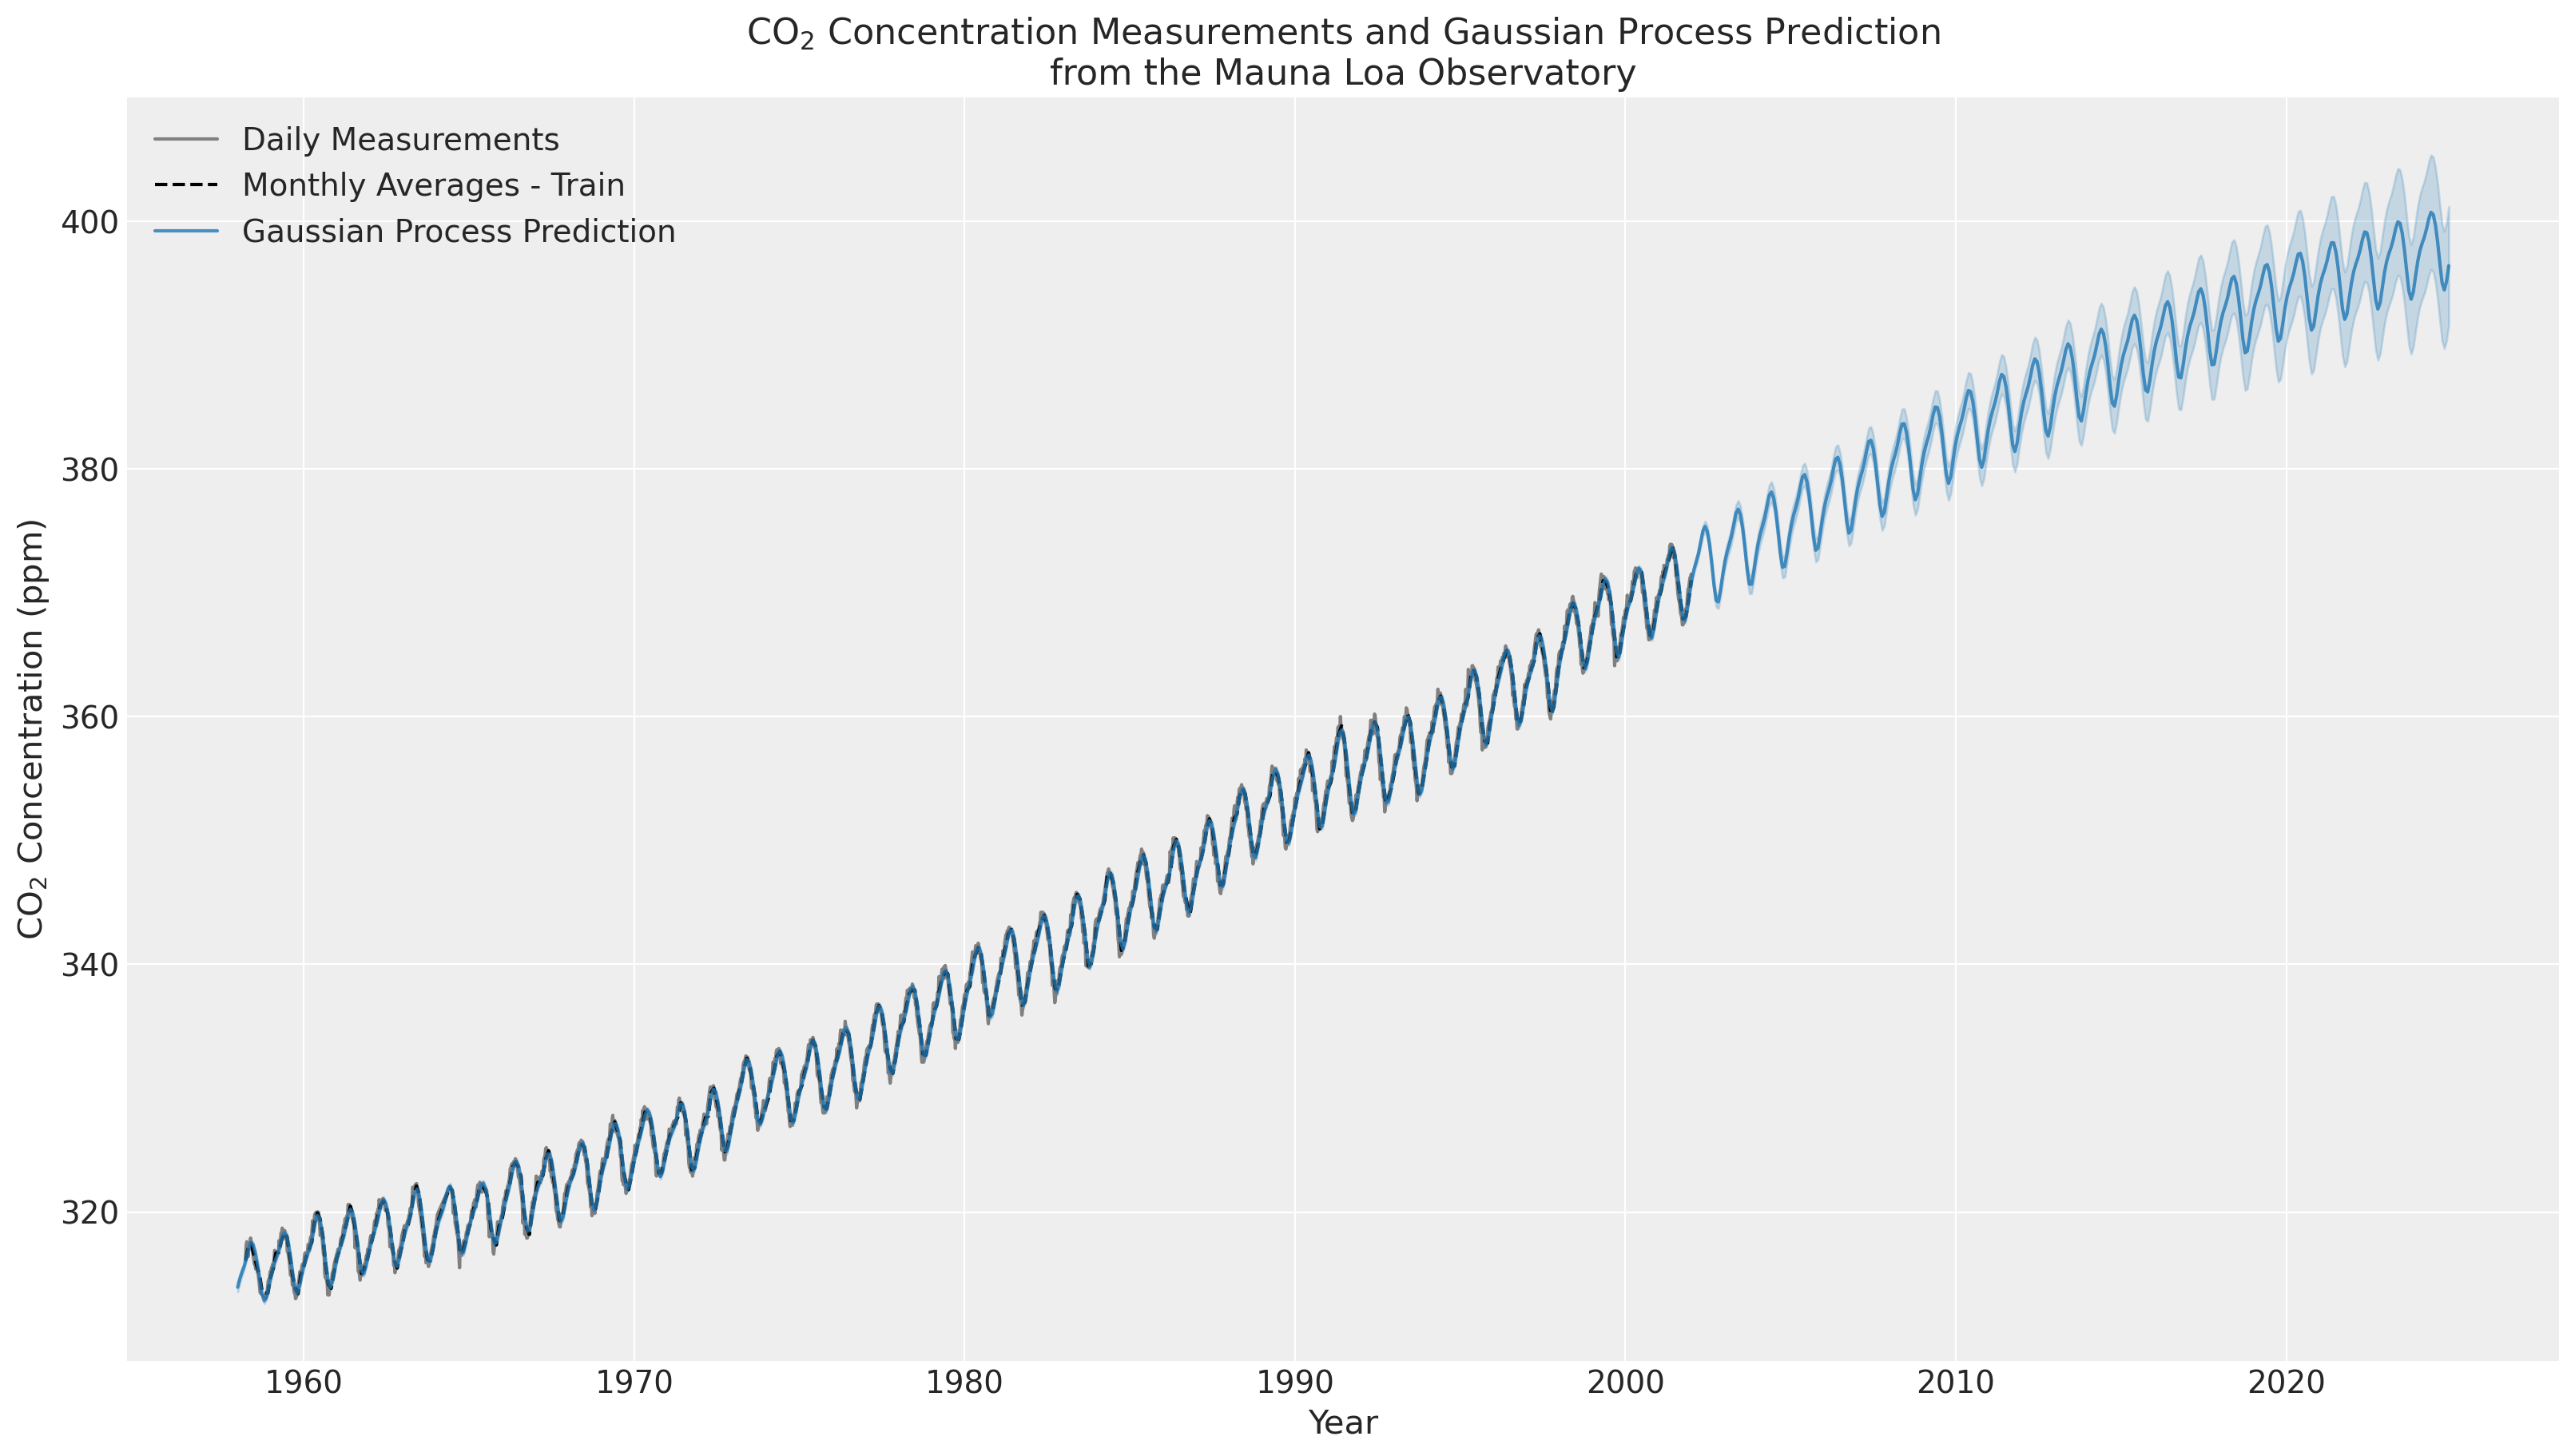

In [10]:
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic, WhiteKernel
import datetime

# Fetch the CO2 dataset from OpenML
co2 = fetch_openml(data_id=41187, as_frame=True)

# Prepare the data
co2_data = co2.frame.copy()
co2_data["date"] = pd.to_datetime(co2_data[["year", "month", "day"]])
co2_data.set_index("date", inplace=True)
co2_data = co2_data[["co2"]].dropna()

# Resample to monthly averages
monthly_co2 = co2_data.resample("ME").mean().dropna()

# Prepare data for Gaussian Process Regression
X = (monthly_co2.index.year + monthly_co2.index.month / 12).to_numpy().reshape(-1, 1)
y = monthly_co2["co2"].to_numpy()

# Define the kernel components
long_term_trend_kernel = 50.0**2 * RBF(length_scale=50.0)
seasonal_kernel = 2.0**2 * RBF(length_scale=100.0) * ExpSineSquared(length_scale=1.0, periodicity=1.0, periodicity_bounds="fixed")
irregularities_kernel = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
noise_kernel = 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.1**2, noise_level_bounds=(1e-5, 1e5))

# Combine kernels
co2_kernel = long_term_trend_kernel + seasonal_kernel + irregularities_kernel + noise_kernel

# Initialize and fit the Gaussian Process model
y_mean = y.mean()
gaussian_process = GaussianProcessRegressor(kernel=co2_kernel, normalize_y=False)
gaussian_process.fit(X, y - y_mean)

# Display fitted kernel parameters
params = gaussian_process.kernel_.get_params()
print("Fitted Kernel Parameters:")
display(params)

# Generate predictions
today = datetime.datetime.now()
current_month = today.year + today.month / 12
X_test = np.linspace(1958, current_month, num=1000).reshape(-1, 1)
mean_y_pred, std_y_pred = gaussian_process.predict(X_test, return_std=True)
mean_y_pred += y_mean

# Plot raw data and Gaussian Process results together
plt.figure(figsize=(16, 9))

# Plot daily measurements
plt.plot(co2_data.index, co2_data["co2"], color="gray", linestyle="-", label="Daily Measurements")

# Plot monthly averages used for modeling
plt.plot(monthly_co2.index, monthly_co2["co2"], color="black", linestyle="dashed", label="Monthly Averages - Train")

# Plot Gaussian Process Prediction
plt.plot(pd.to_datetime((X_test.flatten() - 1958) * 365.25, unit="D", origin="1958-01-01"), mean_y_pred, color="tab:blue", alpha=0.8, label="Gaussian Process Prediction")

# Plot confidence interval
plt.fill_between(pd.to_datetime((X_test.flatten() - 1958) * 365.25, unit="D", origin="1958-01-01"), mean_y_pred - std_y_pred, mean_y_pred + std_y_pred, color="tab:blue", alpha=0.2)

plt.legend()
plt.xlabel("Year")
plt.ylabel("CO$_2$ Concentration (ppm)")
plt.title("CO$_2$ Concentration Measurements and Gaussian Process Prediction\nfrom the Mauna Loa Observatory")
plt.show()

**Fully Bayesian approach with PyMC**

In [11]:
# # Define the Gaussian Process kernel
# with pm.Model() as model:
#     # Long-term trend kernel
#     sigma_lt = pm.HalfNormal("sigma_lt", sigma=50.0)
#     ls_lt = pm.Gamma("ls_lt", alpha=2, beta=0.04)
#     long_term_trend_kernel = pm.gp.cov.Constant(sigma_lt**2) * pm.gp.cov.ExpQuad(input_dim=1, ls=ls_lt)

#     # Seasonal kernel
#     sigma_seasonal = pm.HalfNormal("sigma_seasonal", sigma=2.0)
#     ls_seasonal = pm.Gamma("ls_seasonal", alpha=2, beta=0.02)
#     ls_periodic = pm.Gamma("ls_periodic", alpha=2, beta=2.0)
#     period = 1.0  # Fixed
#     seasonal_kernel = pm.gp.cov.Constant(sigma_seasonal**2) * pm.gp.cov.ExpQuad(input_dim=1, ls=ls_seasonal) * pm.gp.cov.Periodic(input_dim=1, period=period, ls=ls_periodic)

#     # Irregularities kernel
#     sigma_irregular = pm.HalfNormal("sigma_irregular", sigma=0.5)
#     ls_irregular = pm.Gamma("ls_irregular", alpha=2, beta=2.0)
#     alpha_irregular = pm.Gamma("alpha_irregular", alpha=2, beta=1.0)
#     irregularities_kernel = pm.gp.cov.Constant(sigma_irregular**2) * pm.gp.cov.RatQuad(input_dim=1, ls=ls_irregular, alpha=alpha_irregular)

#     # Noise kernel
#     sigma_noise_c = pm.HalfNormal("sigma_noise_c", sigma=0.12)
#     ls_noise = pm.Gamma("ls_noise", alpha=2, beta=20.0)
#     sigma_noise_w = pm.HalfNormal("sigma_noise_w", sigma=0.12)
#     noise_kernel = pm.gp.cov.Constant(sigma_noise_c) * pm.gp.cov.ExpQuad(input_dim=1, ls=ls_noise) + pm.gp.cov.WhiteNoise(sigma=sigma_noise_w)

#     # Combine the kernels
#     co2_kernel = long_term_trend_kernel + seasonal_kernel + irregularities_kernel + noise_kernel

In [12]:
# Define the Gaussian Process kernel
with pm.Model() as model:
    # Long-term trend kernel
    ls_lt = pm.Gamma("ls_lt", alpha=2, beta=0.04)
    long_term_trend_kernel = 44.8**2 * pm.gp.cov.ExpQuad(input_dim=1, ls=ls_lt)

    # Seasonal kernel
    ls_seasonal = pm.Gamma("ls_seasonal", alpha=2, beta=0.02)
    ls_periodic = pm.Gamma("ls_periodic", alpha=2, beta=2.0)
    period = 1.0  # Fixed
    seasonal_kernel = 2.64**2 * pm.gp.cov.ExpQuad(input_dim=1, ls=ls_seasonal) * pm.gp.cov.Periodic(input_dim=1, period=period, ls=ls_periodic)

    # Irregularities kernel
    ls_irregular = pm.Gamma("ls_irregular", alpha=2, beta=2.0)
    alpha_irregular = pm.Gamma("alpha_irregular", alpha=2, beta=1.0)
    irregularities_kernel = 0.536**2  * pm.gp.cov.RatQuad(input_dim=1, ls=ls_irregular, alpha=alpha_irregular)

    # Noise kernel
    ls_noise = pm.Gamma("ls_noise", alpha=2, beta=20.0)
    sigma_noise_w = pm.HalfNormal("sigma_noise_w", sigma=0.12)
    noise_kernel = 0.188**2 * pm.gp.cov.ExpQuad(input_dim=1, ls=ls_noise) + pm.gp.cov.WhiteNoise(sigma=sigma_noise_w)

    # Combine the kernels
    co2_kernel = long_term_trend_kernel + seasonal_kernel + irregularities_kernel + noise_kernel

In [ ]:
with model:
    gp = pm.gp.Marginal(cov_func=co2_kernel)

    # sigma = pm.Deterministic("sigma", sigma_noise)
    y_ = gp.marginal_likelihood("y", X=X.reshape(-1, 1), y=y, sigma=sigma_noise)

    marginal_post = pm.sample(500, tune=200, target_accept=0.95, nuts_sampler="numpyro")

    # add the GP conditional to the model, given the new X values
    f_pred = gp.conditional("f_pred", X_test.reshape(-1, 1))

    # Predict y values at test points using the posterior samples
    y_pred = gp.conditional("y_pred", X_test.reshape(-1, 1), pred_noise=True)
    y_samples = pm.sample_posterior_predictive(marginal_post.sel(draw=slice(0, 20)), var_names=["y_pred"])

    pred_samples = pm.sample_posterior_predictive(marginal_post.sel(draw=slice(0, 20)), var_names=["f_pred"])

  0%|          | 0/700 [00:00<?, ?it/s]

  0%|          | 0/700 [00:00<?, ?it/s]

  0%|          | 0/700 [00:00<?, ?it/s]

  0%|          | 0/700 [00:00<?, ?it/s]

## Disadvantages of Gaussian Process Regression


 - It is expensive to build a model when there is a lot of training data.
An implementation of the algorithm explained here requires the inversion
of the covariance matrix $\Sigma=K(X,X)$ using (Cholesky factorization),
with a memory complexity of $O(n^{2})$ and a computational complexity
of $O(n^{3})$. There has been work on GP models that only include
a **subset of the data** (Gramacy and Apley 2015) which can be
implemented efficiently (Gramacy et al. 2014).
 - Finding kernels (similarity functions) that suit the data can be time consuming, and it is an ongoing research area.
 -  Another issue of the model is stationary covariance function is assumed,
but for many problems, the character of the covariance function needs
to change in different regimes. Gramacy and Lee (2008) developed a
**hybrid tree-Gaussian process model** that allows the
covariance function to change over the range of input data.